# CNN on MNIST Dataset, Mohsin Bin Ramzan F22607016

Importing the necessary libraries 

In [1]:
import tensorflow as tf
import numpy as np

Loading the dataset

In [ ]:

from keras.datasets import mnist
(X_train, Y_train),(X_test, Y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


here we have load the mnist dataset from sklearn and have split it into the test and train 

Data Visualizing and  Preprocessing

In [38]:
print("Total number of training samples are %d " % len(X_train))
print("Total number of testing samples are %d " % len(X_test))

Total number of training samples are 60000 
Total number of testing samples are 10000 


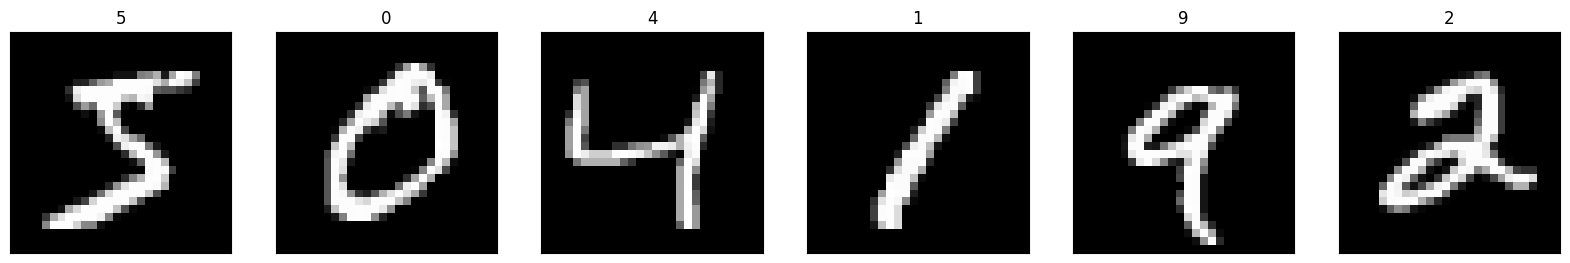

In [ ]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize =(20,20))
for i in range(6):
  plot=fig.add_subplot(1,6, i+1 , xticks=[], yticks=[])
  plot.imshow(X_train[i], cmap='gray')
  plot.set_title(str(Y_train[i]))

Rescaling the Images by Dividing Every Pixel in Every Image by 255

In [ ]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

now adding a new axis to our training and testig samples

In [ ]:
X_train=X_train[...,np.newaxis]
X_test=X_test[..., np.newaxis]

In [7]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


Applying One-Hot Encoding technique to convert  categorical variables 

In [ ]:
import keras
from keras.utils import to_categorical
Y_train=to_categorical(Y_train, 10)
Y_test=to_categorical(Y_test, 10)

In [9]:
print(Y_train.shape)  # Should be (60000, 10)
print(Y_test.shape)   # Should be (10000, 10)

(60000, 10)
(10000, 10)


In [ ]:
print("X_train shape:", X_train.shape)  # Expected(60000, 28, 28, 1)
print("Y_train shape:", Y_train.shape)  # Expected(60000, 10)
print("X_test shape:", X_test.shape)    # Expected(10000, 28, 28, 1)
print("Y_test shape:", Y_test.shape)    # Expected(10000, 10)


X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)
X_test shape: (10000, 28, 28, 1)
Y_test shape: (10000, 10)


Defining the **model_1** architecture

In [16]:
# Model definition
num_classes = 10
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=6, kernel_size=5, activation='sigmoid', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=16, kernel_size=5, activation='sigmoid'),
    tf.keras.layers.AvgPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(120, activation='sigmoid'),
    tf.keras.layers.Dense(84, activation='sigmoid'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


Model Summary

In [ ]:
model_1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_4                  │ (None, 14, 14, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_5                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

Now Compiling the Model

In [ ]:
model_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Fitting the Model

In [ ]:
history_1 = model_1.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5111 - loss: 1.4057 - val_accuracy: 0.9280 - val_loss: 0.2393
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9308 - loss: 0.2244 - val_accuracy: 0.9563 - val_loss: 0.1376
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9587 - loss: 0.1342 - val_accuracy: 0.9703 - val_loss: 0.0955
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9700 - loss: 0.1004 - val_accuracy: 0.9749 - val_loss: 0.0770
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9779 - loss: 0.0748 - val_accuracy: 0.9757 - val_loss: 0.0754
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9797 - loss: 0.0663 - val_accuracy: 0.9801 - val_loss: 0.0641
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9831 - loss: 0.0546 - val_accuracy: 0.9811 - val_loss: 0.0610
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9848 - loss: 0.0513 -

Visualizing the results

In [1]:
import matplotlib.pyplot as plt
accuracy = history_1.history['accuracy']
val_accuracy = history_1.history['val_accuracy']
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']

epochs=range(1, len(accuracy) +1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2,1)
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Trainig and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

NameError: name 'history_1' is not defined

Definin the **model_2** architecture

In [ ]:
num_classes = 10
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model Summary

In [27]:
model_2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2304)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │         295,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 322,762 (1.23 MB)

 Trainable params: 322,762 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Compiling the Model

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Train the Model

In [ ]:
history_2 = model_2.fit(X_train, Y_train, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8949 - loss: 0.3260 - val_accuracy: 0.9821 - val_loss: 0.0548
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9859 - loss: 0.0455 - val_accuracy: 0.9873 - val_loss: 0.0390
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0290 - val_accuracy: 0.9888 - val_loss: 0.0328
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9932 - loss: 0.0208 - val_accuracy: 0.9908 - val_loss: 0.0267
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9945 - loss: 0.0174 - val_accuracy: 0.9878 - val_loss: 0.0417
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9956 - loss: 0.0135 - val_accuracy: 0.9879 - val_loss: 0.0420
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9963 - loss: 0.0111 - val_accuracy: 0.9898 - val_loss: 0.0366
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9967 - loss: 0.0093 - 

Visualizing  the results

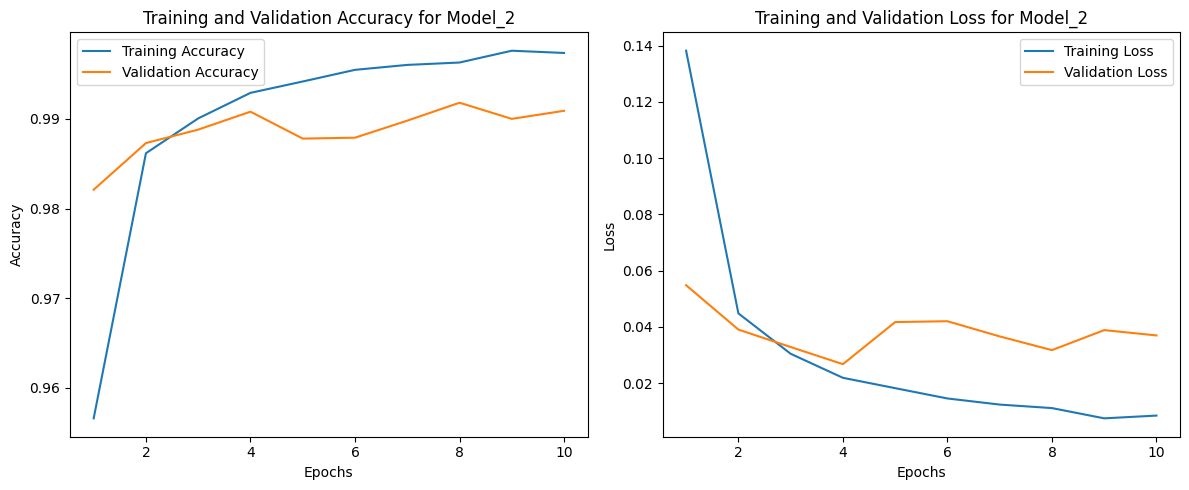

In [ ]:

accuracy = history_2.history['accuracy']
val_accuracy = history_2.history['val_accuracy']
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(1, len(accuracy) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy for Model_2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss for Model_2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Defining the **model_3** architecture

Model Artitecture

In [ ]:
num_classes = 10
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Compile the Model

In [ ]:
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Implement Early Stopping

In [ ]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',     # Monitor the validation loss
    patience=3,              # Stop training after 3 epochs when no improvement in the model accuracy
    restore_best_weights=True # Restore the best model weights
)

Train the Model

In [ ]:

history_3 = model_3.fit(X_train, Y_train, epochs=20, validation_data=(X_test, Y_test), callbacks=[early_stopping])

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9026 - loss: 0.3064 - val_accuracy: 0.9891 - val_loss: 0.0326
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9881 - loss: 0.0371 - val_accuracy: 0.9912 - val_loss: 0.0283
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9927 - loss: 0.0242 - val_accuracy: 0.9869 - val_loss: 0.0365
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9940 - loss: 0.0184 - val_accuracy: 0.9928 - val_loss: 0.0228
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9955 - loss: 0.0144 - val_accuracy: 0.9926 - val_loss: 0.0236
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9967 - loss: 0.0108 - val_accuracy: 0.9914 - val_loss: 0.0294
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9968 - loss: 0.0094 - val_accuracy: 0.9916 - val_loss: 0.0276


Making Prediction of 10 Random Samples

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step


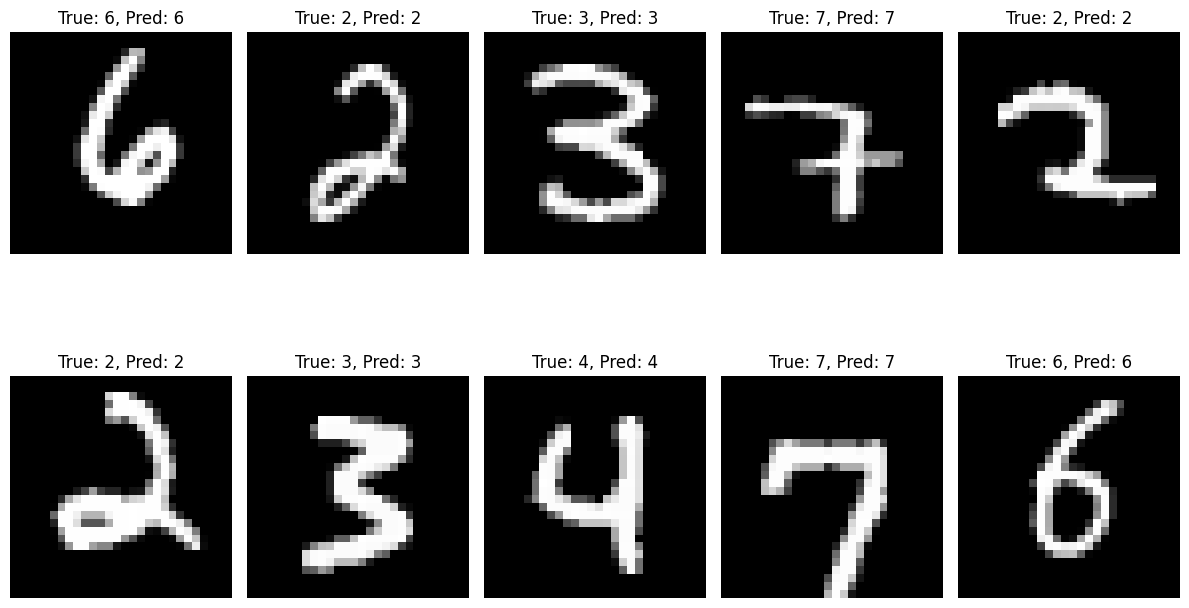

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
random_indices = np.random.choice(X_test.shape[0], size=10, replace=False)
sample_images = X_test[random_indices]
true_labels = Y_test[random_indices]


predictions = model_2.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

true_labels_classes = np.argmax(true_labels, axis=1)

plt.figure(figsize=(12, 8))

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {true_labels_classes[i]}, Pred: {predicted_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
